In [260]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [261]:
data = pd.read_csv('C:/Users/HP/Desktop/задание2/winequality-red.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [262]:
dim = data.shape[1]

scale = StandardScaler(with_mean = True, with_std = True)

data = scale.fit_transform(data)
pca = PCA(n_components = dim)
pca_test = pca.fit(data)

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

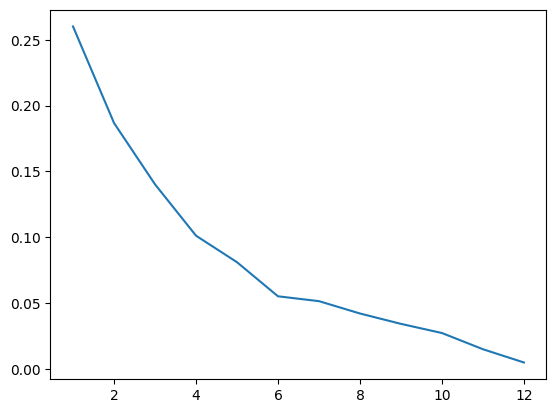

In [263]:
plt.plot(range(1,dim+1),evr)

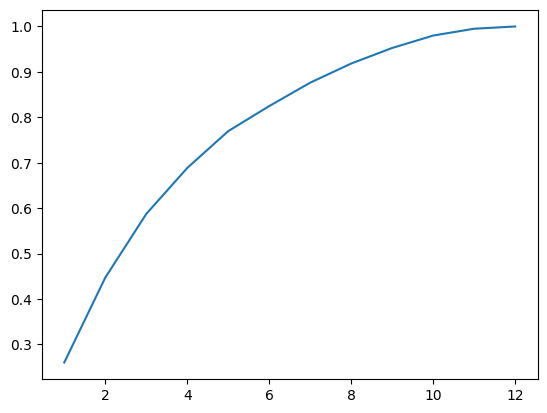

In [264]:
plt.plot(range(1,dim+1),cvr)

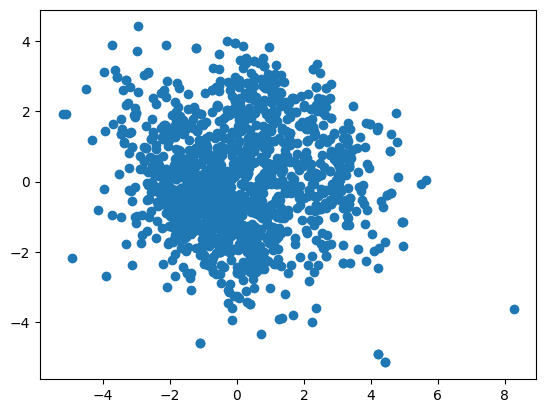

In [265]:
k = 5

pca = PCA(n_components = k)
K = pca.fit_transform(data)

plt.scatter(K[:,0],K[:,1])

In [266]:
inertias = []

for i in range(1, 10):
    clus = KMeans(n_clusters=i)
    clus.fit(K)  # Apprentissage du modèle k-means
    inertias.append(clus.inertia_)  # Ajouter l'inertie du modèle à la liste


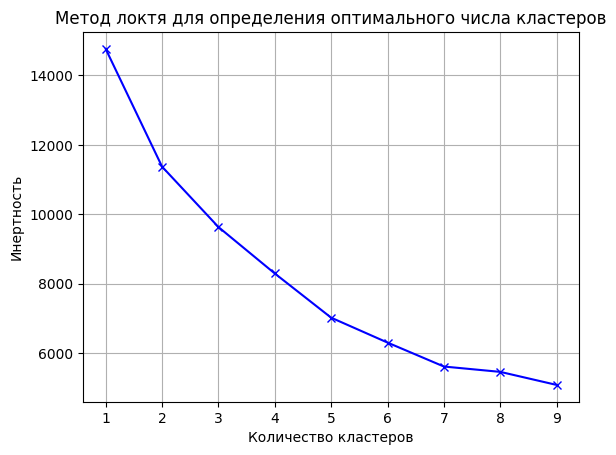

In [267]:
# Визуализация метода локтя
plt.plot(range(1, 10), inertias, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инертность')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.grid(True)
plt.show()


In [268]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(K)  




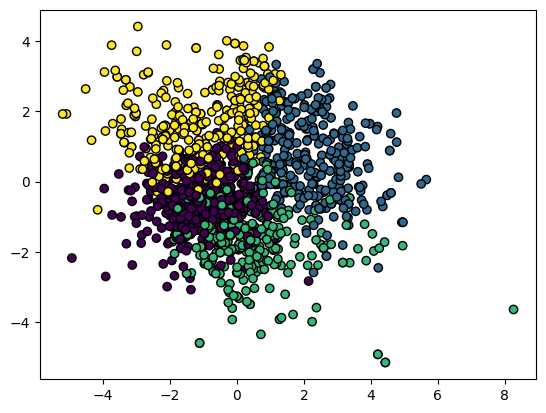

In [269]:
plt.scatter(K[:, 0], K[:, 1], c=labels,edgecolor='k')


In [270]:
X = data  # Les données après réduction de dimension
y = labels    # Les étiquettes obtenues par K-Means
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)  # Увеличьте max_iter при необходимости
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)


Точность: 0.9895833333333334


In [271]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matrice de confusion :\n {conf_matrix}")

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print(f"Rapport de classification :\n {class_report}")

Matrice de confusion :
 [[161   0   0   0]
 [  0 115   0   1]
 [  2   0  93   0]
 [  1   0   1 106]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.99      1.00       116
           2       0.99      0.98      0.98        95
           3       0.99      0.98      0.99       108

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

